In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pymc3 as pm
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
# %matplotlib widget
# %matplotlib notebook
%config Inline.backend.figure_format='retina'
az.style.use("arviz-darkgrid")

In [2]:
X, y = fetch_california_housing(return_X_y=True)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [3]:
train_data = pd.DataFrame(X_train, columns=fetch_california_housing().feature_names)
train_data.insert(0, 'MedHouseValue', y_train)

In [4]:
train_data.head()

,MedHouseValue,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.030,-0.321654,0.346478,-0.166259,-0.190451,0.772251,0.059808,-1.367976,1.267645
1,3.821,-0.030620,1.617807,-0.386181,-0.117472,-0.098440,-0.128306,-0.871699,0.703627
2,1.726,0.150349,-1.957806,0.087641,-0.235400,-0.450778,-0.033453,-0.455012,-0.454356
3,0.934,-1.014947,0.584852,-0.576442,-0.132670,-0.006602,0.088940,-1.377340,1.227714
4,0.965,-0.166583,1.141059,0.339282,0.079205,-0.486983,-0.074203,0.537543,-0.114948


In [9]:
df = train_data[["Latitude", "Longitude", "MedHouseValue"]]
df.head()

,Latitude,Longitude,MedHouseValue
0,-1.367976,1.267645,1.030
1,-0.871699,0.703627,3.821
2,-0.455012,-0.454356,1.726
3,-1.377340,1.227714,0.934
4,0.537543,-0.114948,0.965


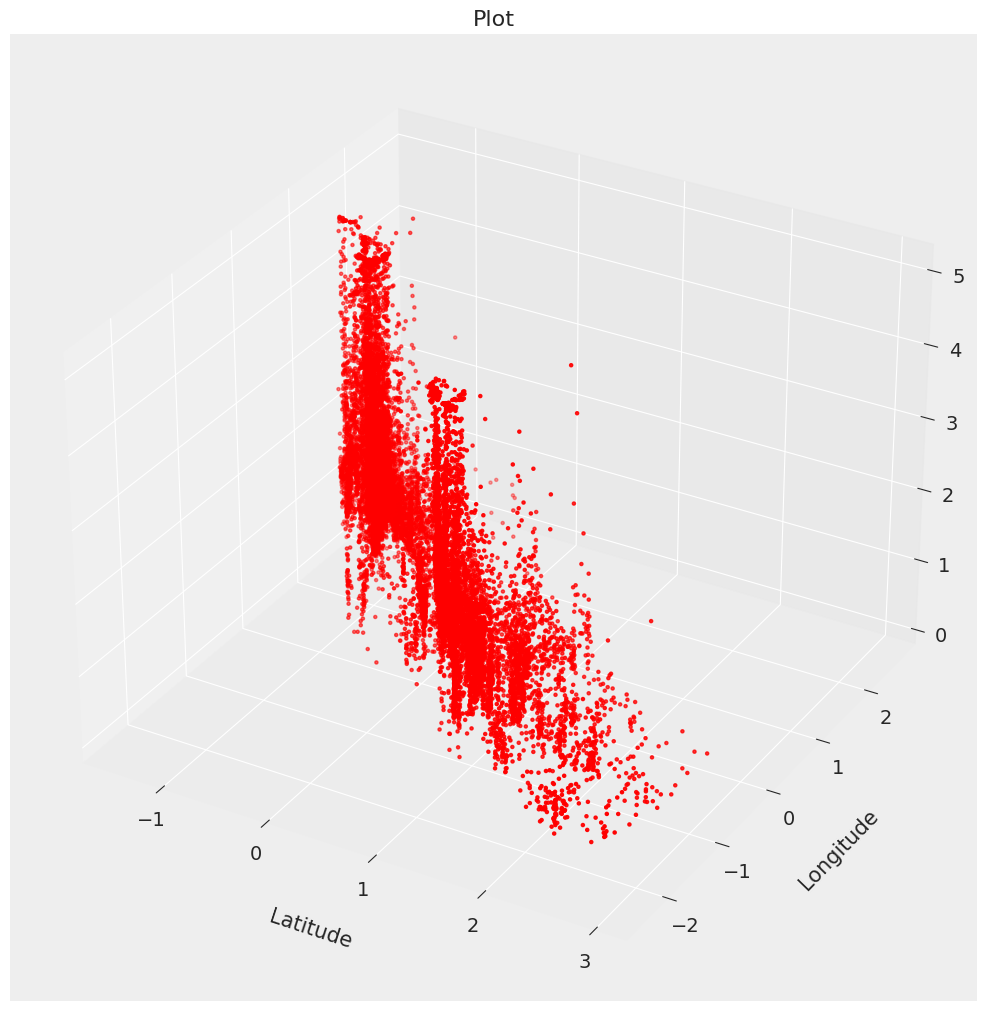

In [22]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(df["Latitude"], df["Longitude"], df["MedHouseValue"], c = 'r', s = 5)
ax.set_title('Plot')

# Set axes label
ax.set_xlabel('Latitude', labelpad=20)
ax.set_ylabel('Longitude', labelpad=20)
ax.set_zlabel('Medium House Value', labelpad=20)

plt.show()

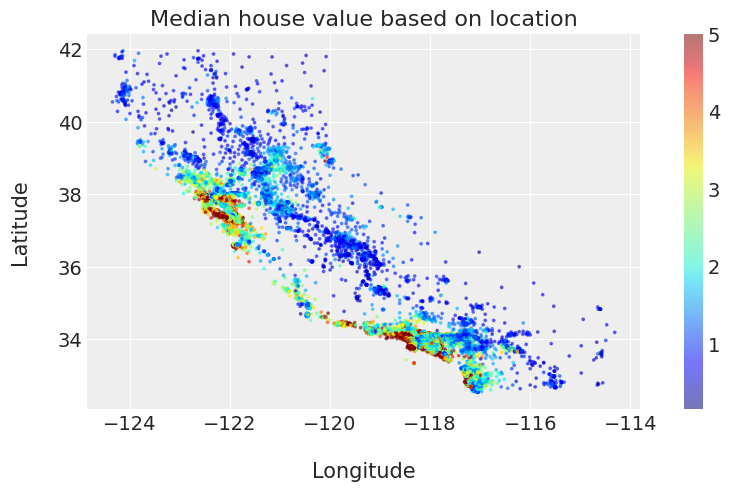

In [57]:
unscaled_data = pd.DataFrame(X, columns=fetch_california_housing().feature_names)
unscaled_data.insert(0, 'MedHouseValue', y)

unscaled_df = unscaled_data[["Latitude", "Longitude", "MedHouseValue"]]

plt.scatter( unscaled_df["Longitude"], unscaled_df["Latitude"], c=unscaled_df["MedHouseValue"], s = 3, alpha=0.5, cmap=plt.cm.jet)

plt.title("Median house value based on location")
plt.xlabel('Longitude', labelpad=20)
plt.ylabel('Latitude', labelpad=20)
plt.colorbar()
plt.show()

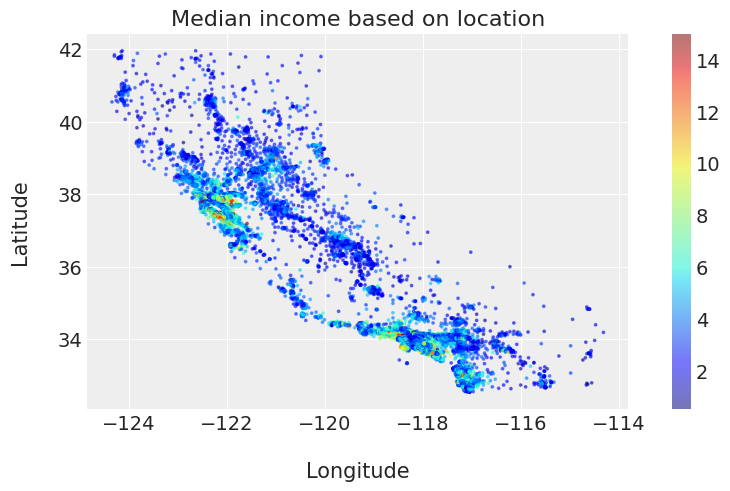

In [56]:
unscaled_data = pd.DataFrame(X, columns=fetch_california_housing().feature_names)
unscaled_data.insert(0, 'MedHouseValue', y)

unscaled_df = unscaled_data[["Latitude", "Longitude", "MedInc"]]

plt.scatter( unscaled_df["Longitude"], unscaled_df["Latitude"], c=unscaled_df["MedInc"], s = 3, alpha=0.5, cmap=plt.cm.jet)

plt.title("Median income based on location")
plt.xlabel('Longitude', labelpad=20)
plt.ylabel('Latitude', labelpad=20)
plt.colorbar()
plt.show()

# Preprocessing

In [44]:
full_dataset = pd.DataFrame(X, columns=fetch_california_housing().feature_names)
full_dataset.insert(0, 'MedHouseValue', y)
full_dataset.describe()

,MedHouseValue,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.149990,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [59]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedHouseValue  20640 non-null  float64
 1   MedInc         20640 non-null  float64
 2   HouseAge       20640 non-null  float64
 3   AveRooms       20640 non-null  float64
 4   AveBedrms      20640 non-null  float64
 5   Population     20640 non-null  float64
 6   AveOccup       20640 non-null  float64
 7   Latitude       20640 non-null  float64
 8   Longitude      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [63]:
print(full_dataset['MedHouseValue'].isnull().sum())
print(full_dataset['MedInc'].isnull().sum())
print(full_dataset['HouseAge'].isnull().sum())
print(full_dataset['AveRooms'].isnull().sum())
print(full_dataset['AveBedrms'].isnull().sum())
print(full_dataset['Population'].isnull().sum())
print(full_dataset['AveOccup'].isnull().sum())
print(full_dataset['Latitude'].isnull().sum())
print(full_dataset['Longitude'].isnull().sum())

0
0
0
0
0
0
0
0
0


array([[<AxesSubplot: title={'center': 'MedHouseValue'}>,
        <AxesSubplot: title={'center': 'MedInc'}>,
        <AxesSubplot: title={'center': 'HouseAge'}>],
       [<AxesSubplot: title={'center': 'AveRooms'}>,
        <AxesSubplot: title={'center': 'AveBedrms'}>,
        <AxesSubplot: title={'center': 'Population'}>],
       [<AxesSubplot: title={'center': 'AveOccup'}>,
        <AxesSubplot: title={'center': 'Latitude'}>,
        <AxesSubplot: title={'center': 'Longitude'}>]], dtype=object)

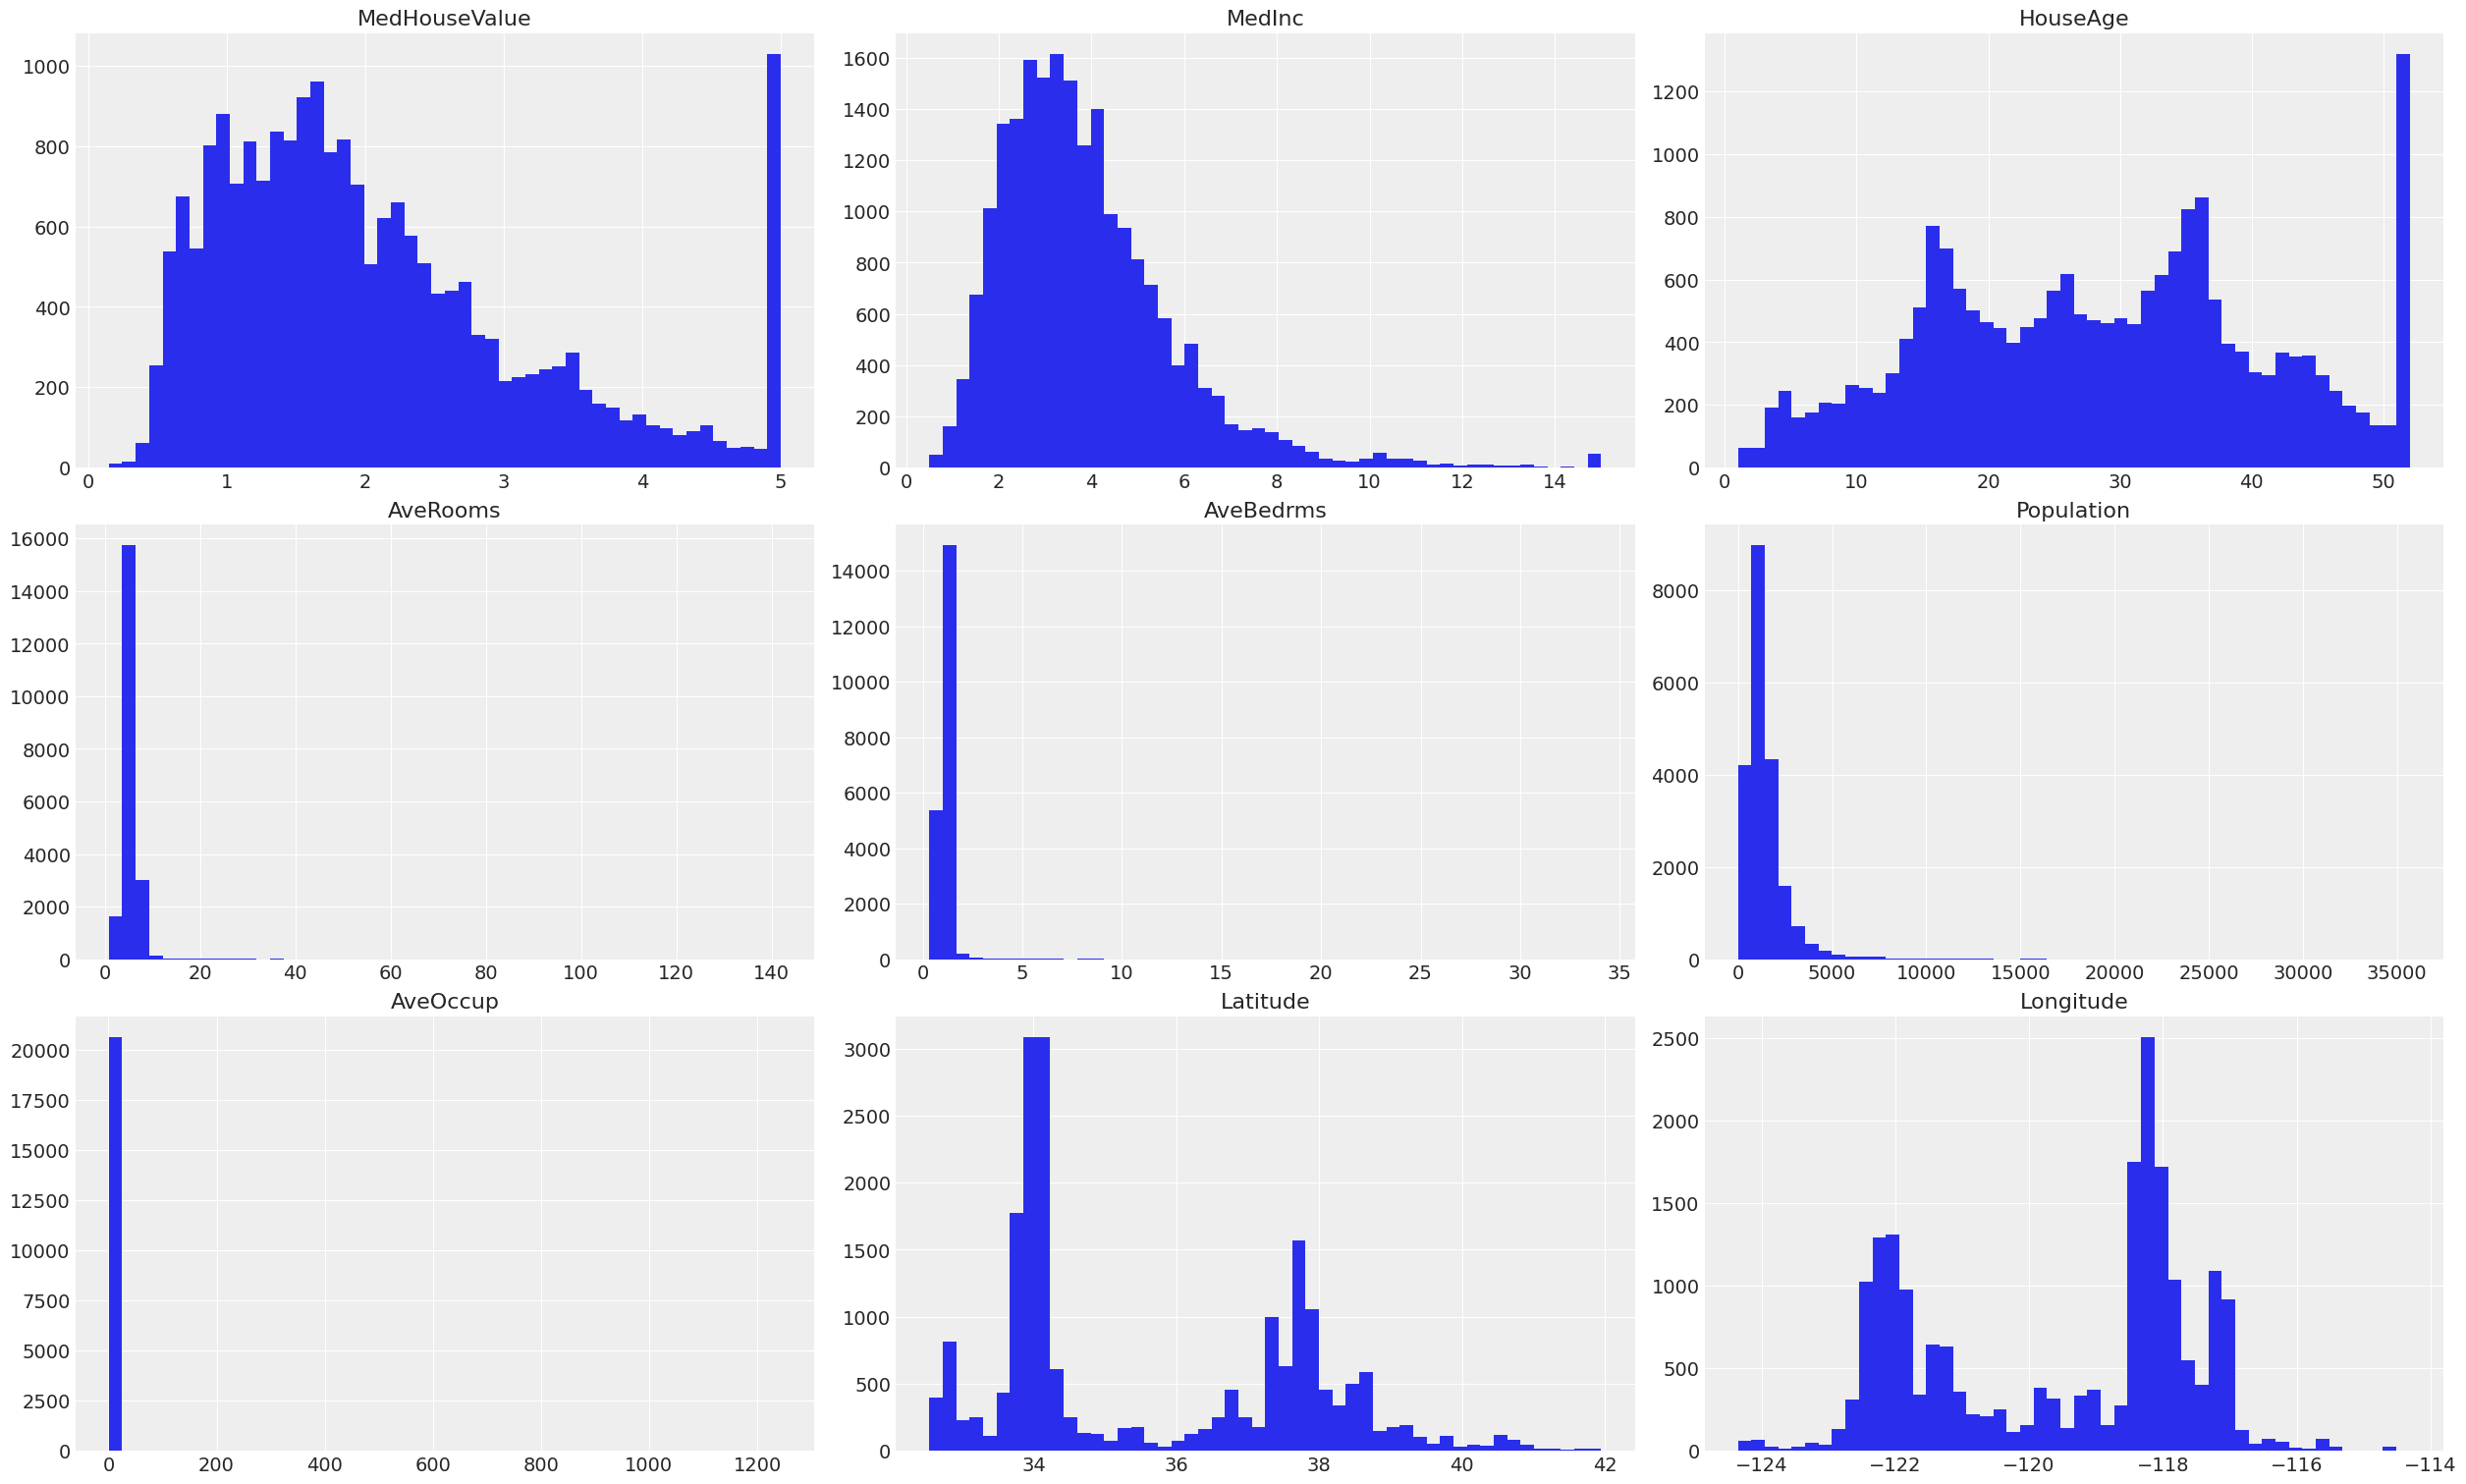

In [55]:
full_dataset.hist(bins=50, figsize=(25, 15))

## Full Dataset

In [10]:
# https://stackoverflow.com/questions/65911705/is-there-a-way-to-run-glm-from-formula-without-the-intercept-pymc3
headers = list(train_data.columns.values)
formula = f'{headers[0]} ~ ' + ' + '.join(headers[1:])
with pm.Model() as model:
    priors = pm.glm.families.Normal()
    pm.GLM.from_formula(formula, data=train_data, family=priors)
    trace = pm.sample(draws=5000, cores = 6)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sd, Longitude, Latitude, AveOccup, Population, AveBedrms, AveRooms, HouseAge, MedInc, Intercept]


Sampling 6 chains for 1_000 tune and 5_000 draw iterations (6_000 + 30_000 draws total) took 113 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot: title={'center': 'Intercept'}>,
        <AxesSubplot: title={'center': 'Intercept'}>],
       [<AxesSubplot: title={'center': 'MedInc'}>,
        <AxesSubplot: title={'center': 'MedInc'}>],
       [<AxesSubplot: title={'center': 'HouseAge'}>,
        <AxesSubplot: title={'center': 'HouseAge'}>],
       [<AxesSubplot: title={'center': 'AveRooms'}>,
        <AxesSubplot: title={'center': 'AveRooms'}>],
       [<AxesSubplot: title={'center': 'AveBedrms'}>,
        <AxesSubplot: title={'center': 'AveBedrms'}>],
       [<AxesSubplot: title={'center': 'Population'}>,
        <AxesSubplot: title={'center': 'Population'}>],
       [<AxesSubplot: title={'center': 'AveOccup'}>,
        <AxesSubplot: title={'center': 'AveOccup'}>],
       [<AxesSubplot: title={'center': 'Latitude'}>,
        <AxesSubplot: title={'center': 'Latitude'}>],
       [<AxesSubplot: title={'center': 'Longitude'}>,
        <AxesSubplot: title={'center': 'Longitude'}>],
       [<AxesSubplot: title={'c

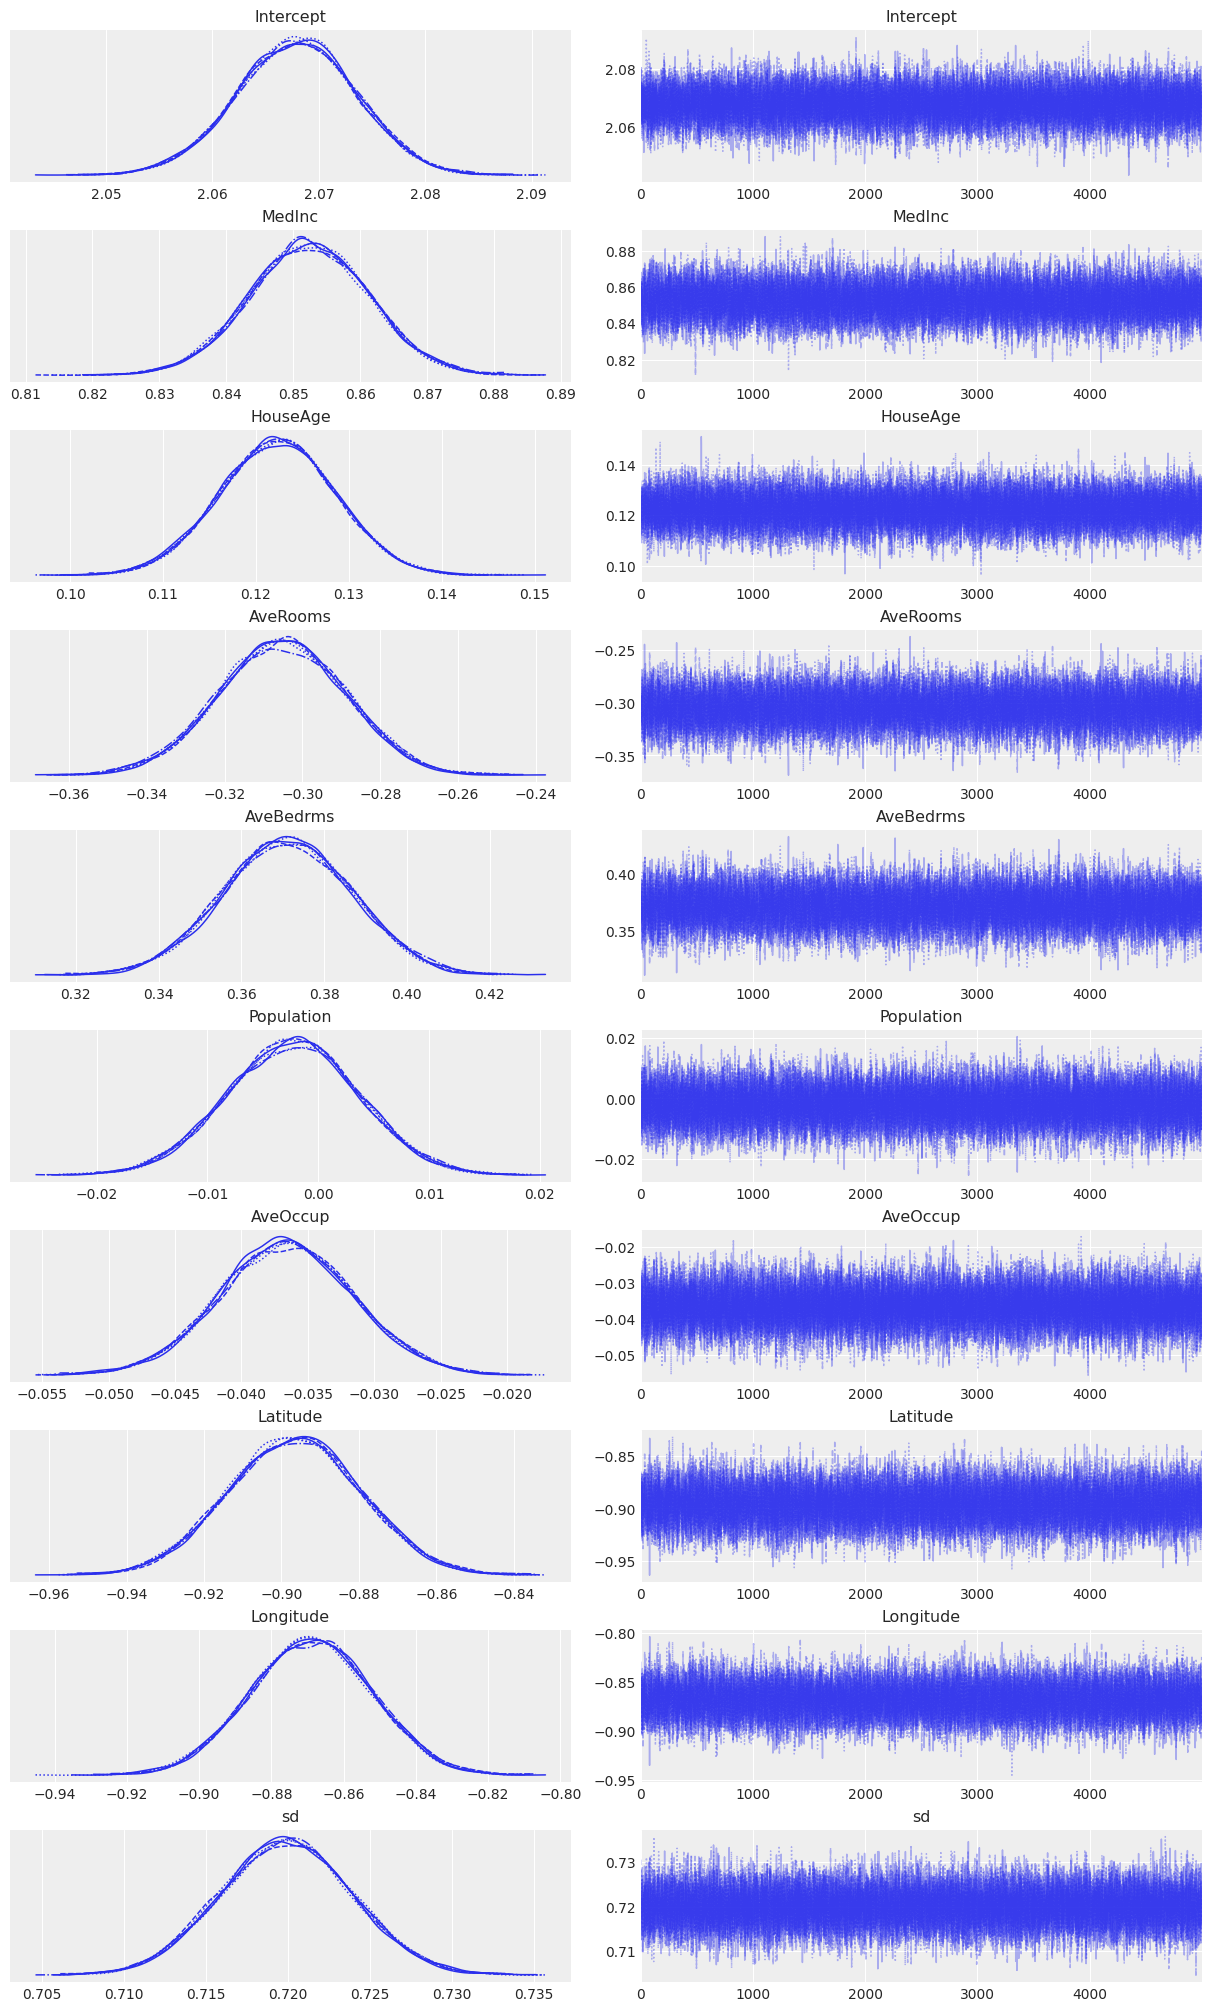

In [11]:
az.plot_trace(trace)

In [12]:
az.summary(trace, round_to=2)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,2.07,0.01,2.06,2.08,0.0,0.0,32451.37,21079.46,1.0
MedInc,0.85,0.01,0.84,0.87,0.0,0.0,19940.17,21270.70,1.0
HouseAge,0.12,0.01,0.11,0.13,0.0,0.0,28552.64,23046.41,1.0
AveRooms,-0.31,0.02,-0.33,-0.27,0.0,0.0,18298.85,18533.40,1.0
AveBedrms,0.37,0.02,0.34,0.40,0.0,0.0,18803.24,19382.67,1.0
Population,-0.00,0.01,-0.01,0.01,0.0,0.0,29132.38,22608.30,1.0
AveOccup,-0.04,0.01,-0.05,-0.03,0.0,0.0,33056.84,21407.56,1.0
Latitude,-0.90,0.02,-0.93,-0.87,0.0,0.0,21211.63,21392.38,1.0
Longitude,-0.87,0.02,-0.90,-0.84,0.0,0.0,21276.79,21009.58,1.0
sd,0.72,0.00,0.71,0.73,0.0,0.0,33066.05,22010.12,1.0


## 50 samples

In [13]:
samples_50 = train_data.iloc[:50]

with pm.Model() as model:
    priors = pm.glm.families.Normal()
    pm.GLM.from_formula(formula, data=samples_50, family=priors)
    trace_50 = pm.sample(draws=5000, cores = 6)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sd, Longitude, Latitude, AveOccup, Population, AveBedrms, AveRooms, HouseAge, MedInc, Intercept]


Sampling 6 chains for 1_000 tune and 5_000 draw iterations (6_000 + 30_000 draws total) took 31 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


In [14]:
az.summary(trace_50, round_to=2)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,1.95,0.08,1.79,2.11,0.00,0.00,29991.77,19808.34,1.0
MedInc,1.13,0.16,0.84,1.43,0.00,0.00,20828.87,20628.54,1.0
HouseAge,0.13,0.09,-0.03,0.29,0.00,0.00,27188.40,21102.05,1.0
AveRooms,-1.19,0.36,-1.86,-0.50,0.00,0.00,21117.76,19952.32,1.0
AveBedrms,0.96,0.66,-0.29,2.18,0.00,0.00,21785.61,20651.32,1.0
Population,0.08,0.08,-0.06,0.24,0.00,0.00,25229.61,21173.53,1.0
AveOccup,-2.86,1.17,-5.02,-0.65,0.01,0.01,27222.94,21796.82,1.0
Latitude,-0.39,0.29,-0.92,0.15,0.00,0.00,18308.40,18595.12,1.0
Longitude,-0.48,0.28,-1.01,0.06,0.00,0.00,17719.21,19291.21,1.0
sd,0.56,0.06,0.45,0.68,0.00,0.00,20575.84,13828.69,1.0


## 500 Samples

In [15]:
samples_500 = train_data.iloc[:500]

with pm.Model() as model:
    priors = pm.glm.families.Normal()
    pm.GLM.from_formula(formula, data=samples_500, family=priors)
    trace_500 = pm.sample(draws=5000, cores = 6)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sd, Longitude, Latitude, AveOccup, Population, AveBedrms, AveRooms, HouseAge, MedInc, Intercept]


Sampling 6 chains for 1_000 tune and 5_000 draw iterations (6_000 + 30_000 draws total) took 28 seconds.


In [16]:
az.summary(trace_500, round_to=2)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,2.03,0.03,1.98,2.09,0.0,0.0,35438.94,21642.19,1.0
MedInc,0.86,0.05,0.76,0.95,0.0,0.0,19209.55,21181.67,1.0
HouseAge,0.16,0.03,0.10,0.23,0.0,0.0,29533.04,22269.67,1.0
AveRooms,-0.14,0.09,-0.31,0.03,0.0,0.0,18124.24,19976.20,1.0
AveBedrms,0.17,0.08,0.02,0.32,0.0,0.0,18812.76,19683.97,1.0
Population,0.04,0.03,-0.02,0.10,0.0,0.0,31483.97,23442.25,1.0
AveOccup,-1.94,0.32,-2.54,-1.35,0.0,0.0,31675.88,21502.77,1.0
Latitude,-0.95,0.09,-1.12,-0.78,0.0,0.0,21198.92,21058.81,1.0
Longitude,-0.88,0.09,-1.06,-0.71,0.0,0.0,21834.14,20012.73,1.0
sd,0.66,0.02,0.62,0.71,0.0,0.0,31461.96,21327.90,1.0
